# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import pickle
import sys  
import matplotlib.pyplot as plt

# Set Directory Paths

In [2]:
# Location of the data folder
%store -r dataDir

# Location of where the formatted data will be saved to
%store -r layer_dataDir

# Loading Layer Neuron Data

In [3]:
layer_neuron_df = pd.read_excel(os.path.join(dataDir, 'allDATA_byTYPE.xlsx'))

In [4]:
layer_neuron_df

,NeuN Merge,Ratio Merge,AutopsyID,Hemisphere,DiagnosticHemi,CorticalType,AnatomyROI,Meso_Iso,Antibody,L1,...,CDR_Total,BEH_0-13_Year0,BEH_0-13_Year1,BEH_0-13_Year3,BEH_0-13_Year5,BEH_3-1change,BEH_3-0change,BEH_5-0change,#visits,LastVisitfromOnset
0,2012-124_R_1,2012-124_R_NeuN,2012-124,R,Right,1,aCC,Mesocortex,NeuN,0.004898,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
1,2012-124_R_2,2012-124_R_NeuN,2012-124,R,Right,2,aCC,Mesocortex,NeuN,0.016580,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
2,2012-124_R_3,2012-124_R_NeuN,2012-124,R,Right,3,aCC,Mesocortex,NeuN,0.012605,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
3,2012-124_R_4,2012-124_R_NeuN,2012-124,R,Right,4,mOFC,Isocortex,NeuN,0.017521,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
4,2012-124_R_5,2012-124_R_NeuN,2012-124,R,Right,5,MFC,Isocortex,NeuN,NaN,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003_R_4,2007-003_R_SMI32,2007-003,R,Right,4,mOFC,Isocortex,SMI32,0.052816,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1020,2007-003_R_5,2007-003_R_SMI32,2007-003,R,Right,5,MFC,Isocortex,SMI32,0.001465,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1021,2008-001_R_1,2008-001_R_SMI32,2008-001,R,Right,1,aCC,Mesocortex,SMI32,0.000735,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0
1022,2008-001_R_2,2008-001_R_SMI32,2008-001,R,Right,2,aCC,Mesocortex,SMI32,0.000404,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0


## Format into desired format

## Divide into Total neurons (NeuN) vs pyramidal neurons (SMI32)

In [5]:
neuron_type = layer_neuron_df.groupby('Antibody')

# NeuN DataFrame
NeuN_df = neuron_type.get_group('NeuN')
# SMI43 DataFrame
SMI32_df = neuron_type.get_group('SMI32')

In [6]:
NeuN_df

,NeuN Merge,Ratio Merge,AutopsyID,Hemisphere,DiagnosticHemi,CorticalType,AnatomyROI,Meso_Iso,Antibody,L1,...,CDR_Total,BEH_0-13_Year0,BEH_0-13_Year1,BEH_0-13_Year3,BEH_0-13_Year5,BEH_3-1change,BEH_3-0change,BEH_5-0change,#visits,LastVisitfromOnset
0,2012-124_R_1,2012-124_R_NeuN,2012-124,R,Right,1,aCC,Mesocortex,NeuN,0.004898,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
1,2012-124_R_2,2012-124_R_NeuN,2012-124,R,Right,2,aCC,Mesocortex,NeuN,0.016580,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
2,2012-124_R_3,2012-124_R_NeuN,2012-124,R,Right,3,aCC,Mesocortex,NeuN,0.012605,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
3,2012-124_R_4,2012-124_R_NeuN,2012-124,R,Right,4,mOFC,Isocortex,NeuN,0.017521,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
4,2012-124_R_5,2012-124_R_NeuN,2012-124,R,Right,5,MFC,Isocortex,NeuN,NaN,...,x,0.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2011-269_R_4,2011-269_R_NeuN,2011-269,R,Left,4,mOFC,Isocortex,NeuN,0.013425,...,18,3.0,4.0,5.0,6.0,1.0,2.0,3.0,1.0,7.0
1005,2015-118_L_1,2015-118_L_NeuN,2015-118,L,Right,1,aCC,Mesocortex,NeuN,0.004019,...,24,4.0,5.0,5.0,5.0,0.0,1.0,1.0,7.0,7.0
1006,2015-118_L_2,2015-118_L_NeuN,2015-118,L,Right,2,aCC,Mesocortex,NeuN,0.012675,...,24,4.0,5.0,5.0,5.0,0.0,1.0,1.0,7.0,7.0
1007,2015-118_L_3,2015-118_L_NeuN,2015-118,L,Right,3,aCC,Mesocortex,NeuN,0.009477,...,24,4.0,5.0,5.0,5.0,0.0,1.0,1.0,7.0,7.0


In [7]:
SMI32_df

,NeuN Merge,Ratio Merge,AutopsyID,Hemisphere,DiagnosticHemi,CorticalType,AnatomyROI,Meso_Iso,Antibody,L1,...,CDR_Total,BEH_0-13_Year0,BEH_0-13_Year1,BEH_0-13_Year3,BEH_0-13_Year5,BEH_3-1change,BEH_3-0change,BEH_5-0change,#visits,LastVisitfromOnset
5,2002-166_L_1,2002-166_L_SMI32,2002-166,L,Left,1,aCC,Mesocortex,SMI32,0.001076,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
6,2002-166_L_2,2002-166_L_SMI32,2002-166,L,Left,2,aCC,Mesocortex,SMI32,0.000933,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
7,2002-166_L_3,2002-166_L_SMI32,2002-166,L,Left,3,aCC,Mesocortex,SMI32,0.000873,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
8,2002-166_L_4,2002-166_L_SMI32,2002-166,L,Left,4,mOFC,Isocortex,SMI32,0.004009,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
9,2002-166_L_5,2002-166_L_SMI32,2002-166,L,Left,5,MFC,Isocortex,SMI32,NaN,...,11.5,5.0,6.0,6.0,6.0,0.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,2007-003_R_4,2007-003_R_SMI32,2007-003,R,Right,4,mOFC,Isocortex,SMI32,0.052816,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1020,2007-003_R_5,2007-003_R_SMI32,2007-003,R,Right,5,MFC,Isocortex,SMI32,0.001465,...,19,4.0,5.0,5.0,5.0,0.0,1.0,1.0,2.0,6.0
1021,2008-001_R_1,2008-001_R_SMI32,2008-001,R,Right,1,aCC,Mesocortex,SMI32,0.000735,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0
1022,2008-001_R_2,2008-001_R_SMI32,2008-001,R,Right,2,aCC,Mesocortex,SMI32,0.000404,...,19,3.0,3.0,3.0,3.0,0.0,0.0,0.0,3.0,7.0


## NeuN_df - Divide into HC, Tau, TDP

In [8]:
NeuN_cohort_type = NeuN_df.groupby('Group')

# NeuN - HC
NeuN_HC_df = NeuN_cohort_type.get_group('HC')

# NeuN - Tau
NeuN_Tau_df = NeuN_cohort_type.get_group('Tau')

# NeuN - TDP
NeuN_TDP_df = NeuN_cohort_type.get_group('TDP')

In [9]:
print(f"Number of rows in NeuN Total: {len(NeuN_df)}")
print(f"Number of rows in NeuN-HC: {len(NeuN_HC_df)}")
print(f"Number of rows in NeuN-Tau: {len(NeuN_Tau_df)}")
print(f"Number of rows in NeuN-TDP: {len(NeuN_TDP_df)}")

Number of rows in NeuN Total: 512
Number of rows in NeuN-HC: 129
Number of rows in NeuN-Tau: 129
Number of rows in NeuN-TDP: 254


## SMI32_df - Divide into HC, Tau, TDP

In [10]:
SMI32_cohort_type = SMI32_df.groupby('Group')

# SMI32 - HC
SMI32_HC_df = SMI32_cohort_type.get_group('HC')

# SMI32 - Tau
SMI32_Tau_df = SMI32_cohort_type.get_group('Tau')

# SMI32 - TDP
SMI32_TDP_df = SMI32_cohort_type.get_group('TDP')

In [11]:
print(f"Number of rows in SMI32 Total: {len(SMI32_df)}")
print(f"Number of rows in SMI32-HC: {len(SMI32_HC_df)}")
print(f"Number of rows in SMI32-Tau: {len(SMI32_Tau_df)}")
print(f"Number of rows in SMI32-TDP: {len(SMI32_TDP_df)}")

Number of rows in SMI32 Total: 512
Number of rows in SMI32-HC: 129
Number of rows in SMI32-Tau: 131
Number of rows in SMI32-TDP: 252


## Formatting NeuN_HC_df, NeuN_Tau_df, NeuN_TDP_df $\rightarrow$ L23 & L56

### NeuN_HC_df to numpy

In [12]:
NeuN_HC_IDs = np.sort(NeuN_HC_df['AutopsyID'].unique())
print(NeuN_HC_IDs)
print(f"Number of unique IDs in Neun HC: {len(NeuN_HC_IDs)}")

['2007-014' '2009-059' '2010-011' '2010-177' '2010-203' '2011-141'
 '2011-255' '2012-075' '2012-118' '2012-174' '2012-193' '2013-036'
 '2013-039' '2013-092' '2013-147' '2013-165' '2013-172' '2013-189'
 '2013-235' '2014-006' '2014-100' '2014-191' '2014-192' '2014-241'
 '2015-033' '2015-137' '2015-192' '2015-198' '2015-219' '2016-071'
 '2016-113' '2017-191']
Number of unique IDs in Neun HC: 32


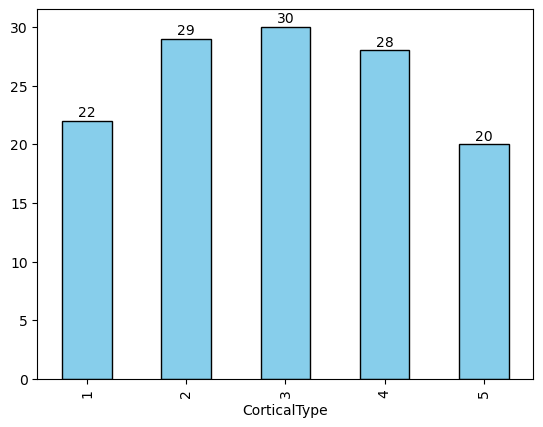

In [13]:
value_counts = NeuN_HC_df['CorticalType'].value_counts().sort_index()

ax = value_counts.plot(kind='bar', edgecolor='black', color='skyblue')
# Annotate each bar with its count
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

In [14]:
NeuN_HC_formatted = pd.pivot_table(NeuN_HC_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [15]:
NeuN_HC_formatted

L23                                               L56  \
CorticalType         1         2         3         4         5         1   
AutopsyID                                                                  
2007-014      0.056535  0.055624  0.062174  0.072643       NaN  0.054666   
2009-059      0.056269  0.059369  0.059030  0.070915       NaN  0.055138   
2010-011      0.072170  0.073430  0.087506  0.082940       NaN  0.082814   
2010-177           NaN       NaN  0.055136  0.068949  0.086550       NaN   
2010-203           NaN  0.052697  0.060842  0.074254       NaN       NaN   
2011-141      0.064410  0.064483  0.067214  0.068783       NaN  0.049476   
2011-255           NaN  0.067300  0.077217  0.069070       NaN       NaN   
2012-075      0.038707  0.046780       NaN       NaN       NaN  0.062746   
2012-118      0.042252  0.044686  0.048403  0.044224  0.033691  0.040547   
2012-174      0.044630  0.054492  0.072929  0.094623       NaN  0.063663   
2012-193      0.042690  0.063951  0.067204  0.092396       NaN  0.043290   
2013-036           NaN  0.082740  0.087246  0.100404  0.111583       NaN   
2013-039      0.041369  0.049805  0.057438  0.058810  0.042804  0.041670   
2013-092           NaN  0.077420  0.096922  0.093987       NaN       NaN   
2013-147      0.074447  0.060526  0.070178       NaN  0.084089  0.072143   
2013-165      0.046869  0.049450  0.063886  0.073866  0.081546  0.047572   
2013-172           NaN  0.052777  0.072278  0.077121  0.073756       NaN   
2013-189      0.046147  0.056446       NaN       NaN  0.063619  0.061432   
2013-235      0.070575  0.065381  0.096420  0.096198  0.078146  0.035939   
2014-006      0.069460  0.076071  0.075880  0.101604  0.095084  0.071934   
2014-100           NaN       NaN  0.079497  0.089623       NaN       NaN   
2014-191           NaN       NaN  0.059746  0.061437  0.052206       NaN   
2014-192      0.054878  0.057339  0.057455  0.076683  0.082953  0.059224   
2014-241           NaN  0.080748  0.088660  0.095781  0.083436       NaN   
2015-033           NaN  0.063120  0.058427       NaN       NaN       NaN   
2015-137      0.057566  0.068398  0.067447  0.074615  0.055584  0.059051   
2015-192      0.074220  0.084198  0.095706  0.101006  0.079784  0.057195   
2015-198      0.055123  0.060383  0.080851  0.103577  0.082192  0.070451   
2015-219      0.061955  0.082422  0.091145  0.096008  0.081342  0.060079   
2016-071      0.074822  0.081873  0.101854  0.088476  0.101989  0.083265   
2016-113      0.051259  0.052875  0.057461  0.071872  0.066192  0.048787   
2017-191      0.071455  0.064283  0.103329  0.101276  0.080143  0.063584   

                                                      
CorticalType         2         3         4         5  
AutopsyID                                             
2007-014      0.058585  0.058593  0.072885       NaN  
2009-059      0.060752  0.061181  0.063180       NaN  
2010-011      0.079401  0.078108  0.081843       NaN  
2010-177           NaN  0.079661  0.080014  0.084227  
2010-203      0.050041  0.051432  0.075501       NaN  
2011-141      0.065699  0.058368  0.068470       NaN  
2011-255      0.065005  0.077586  0.077050       NaN  
2012-075      0.064751       NaN       NaN       NaN  
2012-118      0.039773  0.052039  0.067176  0.028769  
2012-174      0.062144  0.077784  0.091869       NaN  
2012-193      0.057470  0.056713  0.085633       NaN  
2013-036      0.074773  0.081265  0.094326  0.075926  
2013-039      0.054741  0.067506  0.069170  0.046032  
2013-092      0.067681  0.083059  0.083655       NaN  
2013-147      0.081188  0.070028       NaN  0.077355  
2013-165      0.058551  0.068226  0.078620  0.080129  
2013-172      0.049437  0.078115  0.075354  0.060963  
2013-189      0.065700       NaN       NaN  0.091046  
2013-235      0.058079  0.098235  0.097765  0.069564  
2014-006      0.074390  0.080808  0.093166  0.084094  
2014-100           NaN  0.094935  0.078938       NaN  
2014-191           NaN  0.081835  0.06

In [16]:
NeuN_HC = NeuN_HC_formatted.to_numpy()
print(f"Shape of Neun_HC numpy data: {NeuN_HC.shape}")

Shape of Neun_HC numpy data: (32, 10)


### NeuN_Tau_df to numpy

In [17]:
NeuN_Tau_IDs = np.sort(NeuN_Tau_df['AutopsyID'].unique())
print(NeuN_Tau_IDs)
print(f"Number of unique IDs in Neun Tau: {len(NeuN_Tau_IDs)}")

['1995-222' '1996-173' '2000-216' '2002-166' '2003-032' '2006-027'
 '2007-003' '2007-101' '2008-166' '2008-251' '2009-102' '2009-248'
 '2010-015' '2010-209' '2011-060' '2012-046' '2012-238' '2013-018'
 '2013-071' '2013-108' '2013-223' '2014-052' '2014-145' '2014-212'
 '2015-009' '2017-109' '2017-158' '2017-187']
Number of unique IDs in Neun Tau: 28


In [18]:
NeuN_Tau_df['CorticalType'].value_counts()

CorticalType
2    28
5    28
4    27
3    24
1    22
Name: count, dtype: int64

In [19]:
NeuN_Tau_formatted = pd.pivot_table(NeuN_Tau_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [20]:
NeuN_Tau_formatted

L23                                               L56  \
CorticalType         1         2         3         4         5         1   
AutopsyID                                                                  
1995-222           NaN  0.052982       NaN       NaN       NaN       NaN   
1996-173      0.003662  0.008978       NaN  0.037478  0.048295  0.003482   
2000-216      0.020772  0.046129  0.067168  0.074568  0.053661  0.015324   
2002-166      0.004038  0.026064  0.014436  0.081100  0.071146  0.003772   
2003-032      0.058218  0.024001  0.037818  0.041586  0.021465  0.039194   
2006-027           NaN  0.014564  0.017160  0.042337  0.019441       NaN   
2007-003           NaN       NaN       NaN       NaN  0.061240       NaN   
2007-101      0.027162  0.025863  0.043453  0.033592  0.032496  0.016609   
2008-166      0.015119  0.026294  0.033388  0.039398  0.010906  0.006275   
2008-251      0.055449  0.048828  0.059137  0.073350  0.051945  0.046186   
2009-102      0.060977  0.050329  0.061313  0.060451  0.040491  0.072363   
2009-248      0.005983  0.008376  0.041970  0.037748  0.013189  0.004933   
2010-015           NaN  0.006103  0.009222  0.019151  0.011680       NaN   
2010-209      0.017998  0.052246       NaN       NaN       NaN  0.015433   
2011-060           NaN  0.018612  0.017795  0.047910  0.031380       NaN   
2012-046      0.035809  0.038761  0.046953  0.050985  0.037201  0.059163   
2012-238           NaN  0.054089  0.058641  0.052509  0.043857       NaN   
2013-018      0.002516  0.007857  0.028532  0.015287  0.015651  0.003103   
2013-071      0.009954  0.053734  0.060122  0.052440  0.019154  0.011107   
2013-108      0.020730  0.050938  0.050329  0.065247  0.057409  0.020214   
2013-223      0.021977  0.046389  0.037982  0.039971  0.040064  0.035138   
2014-052      0.003498  0.004372  0.006263  0.007887  0.023609  0.004561   
2014-145      0.013180  0.037244       NaN  0.037489  0.027919  0.017903   
2014-212      0.062423  0.057717  0.068622  0.088023  0.081525  0.055229   
2015-009      0.024213  0.052058  0.053366  0.049323  0.023578  0.021934   
2017-109           NaN       NaN       NaN  0.009053  0.006527       NaN   
2017-158      0.004453  0.025029       NaN  0.020145  0.008075  0.001177   
2017-187      0.046072  0.064036  0.066102  0.074842  0.085465  0.062374   

                                                      
CorticalType         2         3         4         5  
AutopsyID                                             
1995-222      0.048617       NaN       NaN       NaN  
1996-173      0.005226       NaN  0.047247  0.056251  
2000-216      0.057781  0.072388  0.092700  0.059589  
2002-166      0.029699  0.012525  0.082256  0.060851  
2003-032      0.019072  0.053145  0.062963  0.017656  
2006-027      0.014212  0.009126  0.040689  0.015373  
2007-003           NaN       NaN       NaN  0.056424  
2007-101      0.023431  0.050154  0.042547  0.033634  
2008-166      0.006711  0.028619  0.043590  0.018272  
2008-251      0.051460  0.053968  0.075567  0.064779  
2009-102      0.059591  0.079343  0.073612  0.035977  
2009-248      0.004235  0.042099  0.043502  0.011304  
2010-015      0.004363  0.006431  0.016100  0.007679  
2010-209      0.053346       NaN       NaN       NaN  
2011-060      0.010679  0.023488  0.078295  0.041658  
2012-046      0.063731  0.074788  0.076097  0.045151  
2012-238      0.049229  0.050154  0.059105  0.041487  
2013-018      0.005615  0.032426  0.014629  0.007994  
2013-071      0.027784  0.042164  0.062031  0.042261  
2013-108      0.039832  0.048778  0.072249  0.064390  
2013-223      0.038385  0.044538  0.059492  0.038836  
2014-052      0.004232  0.006066  0.004289  0.009570  
2014-145      0.023153       NaN  0.054012  0.037921  
2014-212      0.061934  0.065611  0.091604  0.084574  
2015-009      0.053549  0.058940  0.062222  0.030447  
2017-109           NaN       NaN  0.002593  0.007791  
2017-158      0.005396       NaN  0.005466  0.007578  
2017-187    

In [21]:
NeuN_Tau = NeuN_Tau_formatted.to_numpy()
print(f"Shape of NeuN_Tau numpy data: {NeuN_Tau.shape}")

Shape of NeuN_Tau numpy data: (28, 10)


### NeuN_TDP_df to numpy

In [22]:
NeuN_TDP_IDs = np.sort(NeuN_TDP_df['AutopsyID'].unique())
print(NeuN_TDP_IDs)
print(f"Number of unique IDs in Neun TDP: {len(NeuN_TDP_IDs)}")

['1995-005' '1995-217' '1999-170' '1999-224' '2000-149' '2001-108'
 '2001-122' '2002-025' '2002-070' '2002-238' '2003-044' '2003-114'
 '2004-008' '2004-158' '2005-208' '2006-123' '2006-260' '2007-039'
 '2007-111' '2007-148' '2008-001' '2008-156' '2008-205' '2009-033'
 '2009-097' '2009-119' '2009-168' '2011-191' '2011-257' '2011-269'
 '2012-124' '2014-087' '2015-008' '2015-044' '2015-062' '2015-116'
 '2015-118' '2016-009' '2016-037' '2016-161' '2016-165' '2016-241'
 '2017-149' '2017-190' '2018-066' '2018-129' '2018-146' '2018-158'
 '2018-178' '2018-208']
Number of unique IDs in Neun TDP: 50


In [23]:
NeuN_TDP_df['CorticalType'].value_counts()

CorticalType
4    61
2    56
5    53
3    47
1    37
Name: count, dtype: int64

In [24]:
NeuN_TDP_cortical_type = NeuN_TDP_df.groupby('CorticalType')
NeuN_TDP_cortical_type.get_group(4)['AutopsyID'].value_counts()

AutopsyID
2016-009    2
2018-146    2
2015-118    2
2015-062    2
2015-044    2
2011-257    2
2018-129    2
2018-158    2
2005-208    2
2018-208    2
2009-033    2
2009-168    2
2011-269    2
1999-170    1
2012-124    1
2015-008    1
1995-217    1
2016-241    1
2007-039    1
2016-037    1
2009-119    1
2009-097    1
2006-123    1
1995-005    1
2011-191    1
2001-108    1
2001-122    1
2007-111    1
2016-165    1
2017-190    1
2015-116    1
2006-260    1
2000-149    1
2008-001    1
2002-025    1
2002-238    1
2003-114    1
2007-148    1
2004-008    1
2002-070    1
1999-224    1
2008-156    1
2016-161    1
2003-044    1
2018-066    1
2004-158    1
2008-205    1
2017-149    1
Name: count, dtype: int64

In [25]:
NeuN_TDP_formatted = pd.pivot_table(NeuN_TDP_df, values=['L23', 'L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [26]:
NeuN_TDP_formatted

L23                                               L56  \
CorticalType         1         2         3         4         5         1   
AutopsyID                                                                  
1995-005           NaN  0.004053       NaN  0.017605       NaN       NaN   
1995-217      0.052548  0.045306       NaN  0.058377  0.053379  0.063434   
1999-170      0.024994  0.027314  0.019411  0.034593  0.015175  0.026651   
1999-224           NaN  0.017322       NaN  0.034934  0.014589       NaN   
2000-149      0.016251  0.046946       NaN  0.072902  0.052035  0.019680   
2001-108      0.023808  0.044862  0.054582  0.047510       NaN  0.031547   
2001-122           NaN  0.048043  0.064511  0.056413       NaN       NaN   
2002-025      0.026576  0.033235  0.034854  0.047282  0.057559  0.031518   
2002-070           NaN  0.019050  0.007204  0.008834  0.013946       NaN   
2002-238      0.026219  0.045451  0.045963  0.060157  0.071456  0.032237   
2003-044      0.047201  0.046669  0.044781  0.040042  0.050868  0.043862   
2003-114      0.029130  0.018388  0.017144  0.031681  0.028485  0.011632   
2004-008           NaN  0.030983  0.032261  0.042812  0.056380       NaN   
2004-158           NaN  0.043996  0.054476  0.053001  0.050959       NaN   
2005-208      0.021971  0.043119  0.044716  0.055481  0.022484  0.042346   
2006-123      0.001955  0.002707       NaN  0.014918       NaN  0.002409   
2006-260      0.006955  0.035128  0.040200  0.056440  0.073562  0.016395   
2007-039      0.004305  0.004797  0.007557  0.008577  0.001531  0.004361   
2007-111      0.055394  0.060813  0.062970  0.073479  0.061827  0.059024   
2007-148      0.010153  0.010768  0.032167  0.018261  0.014122  0.010549   
2008-001      0.006338  0.003790       NaN  0.026436  0.006256  0.003843   
2008-156           NaN  0.052851       NaN  0.077319  0.064291       NaN   
2008-205      0.017942  0.026345  0.025732  0.028358  0.026621  0.031670   
2009-033      0.032092  0.042582  0.053407  0.035237  0.057035  0.051676   
2009-097           NaN       NaN       NaN  0.029523  0.055272       NaN   
2009-119           NaN  0.049444  0.046037  0.072595  0.048457       NaN   
2009-168      0.056407  0.046346  0.075174  0.076880  0.063753  0.053641   
2011-191           NaN  0.075259  0.087533  0.080303       NaN       NaN   
2011-257           NaN  0.039066  0.044925  0.044122  0.016130       NaN   
2011-269      0.010065  0.019557  0.023579  0.017599  0.002750  0.009058   
2012-124      0.018765  0.041831  0.039480  0.057420  0.062987  0.021450   
2014-087      0.063765  0.062241  0.082066       NaN  0.077371  0.063372   
2015-008      0.038271  0.047942  0.020864  0.058454  0.033197  0.030868   
2015-044      0.037966  0.047813  0.040845  0.023088  0.037674  0.053560   
2015-062      0.004945  0.017135  0.014318  0.017272  0.015189  0.004378   
2015-116           NaN  0.057900       NaN  0.063792  0.078902       NaN   
2015-118      0.016896  0.029150  0.050325  0.025532  0.059420  0.041004   
2016-009      0.036345  0.035184  0.031901  0.040601  0.040277  0.046283   
2016-037           NaN  0.020360       NaN  0.038970  0.013522       NaN   
2016-161      0.044915  0.053595  0.065187  0.049314  0.057487  0.052573   
2016-165      0.059678  0.070024  0.076773  0.067862  0.075270  0.068216   
2016-241      0.045073  0.053224  0.034936  0.064311  0.034908  0.043993   
2017-149           NaN       NaN  0.015347  0.013024  0.017130       NaN   
2017-190           NaN  0.021201  0.015503  0.027061  0.022390       NaN   
2018-066           NaN  0.009927       NaN  0.041657  0.034221       NaN   
2018-129      0.047386  0.058803  0.060379  0.070537  0.074152  0.059313   
2018-146      0.049763  0.062799  0.078978  0.077748  0.065981  0.051014   
2018-158      0.044493  0.059322  0.044898  0.068956  0.070841  0.052095   
2018-178      0.072004  0.078300  0.082284       NaN  0.081775  0.069740   
2018-208      0.069764  0.065466  0.092593  0.098397  0.091457  0.0

In [27]:
NeuN_TDP = NeuN_TDP_formatted.to_numpy()
print(f"Shape of NeuN_TDP numpy data: {NeuN_TDP.shape}")

Shape of NeuN_TDP numpy data: (50, 10)


## Formatting SMI32_HC_df, SMI32_Tau_df, SMI32_TDP_df $\rightarrow$ ln_L23 & ln_L56

### SMI32_HC_df to numpy

In [28]:
SMI32_HC_IDs = np.sort(SMI32_HC_df['AutopsyID'].unique())
print(SMI32_HC_IDs)
print(f"Number of unique IDs in SMI32 HC: {len(SMI32_HC_IDs)}")

['2007-014' '2009-059' '2010-011' '2010-177' '2010-203' '2011-141'
 '2011-255' '2012-075' '2012-118' '2012-174' '2012-193' '2013-036'
 '2013-039' '2013-092' '2013-147' '2013-165' '2013-172' '2013-189'
 '2013-235' '2014-006' '2014-100' '2014-191' '2014-192' '2014-241'
 '2015-033' '2015-137' '2015-192' '2015-198' '2015-219' '2016-071'
 '2016-113' '2017-191']
Number of unique IDs in SMI32 HC: 32


In [29]:
SMI32_HC_df['CorticalType'].value_counts()

CorticalType
3    30
2    29
4    28
1    22
5    20
Name: count, dtype: int64

In [30]:
SMI32_HC_formatted = pd.pivot_table(SMI32_HC_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [31]:
SMI32_HC_formatted

ln_L23                                            ln_L56  \
CorticalType         1         2         3         4         5         1   
AutopsyID                                                                  
2007-014     -5.869131 -5.744920 -4.867432 -4.899720       NaN -4.073712   
2009-059     -5.238671 -5.105950 -4.684143 -3.927986       NaN -3.585200   
2010-011     -5.465241 -4.816392 -3.840316 -4.187601       NaN -3.557127   
2010-177           NaN       NaN -5.387686 -4.973551 -4.172748       NaN   
2010-203           NaN -4.412542 -3.889002 -3.869681       NaN       NaN   
2011-141     -4.852664 -4.693026 -3.377173 -4.036916       NaN -2.946921   
2011-255           NaN -3.560408 -4.981651 -3.728623       NaN       NaN   
2012-075     -4.436848 -4.449497       NaN       NaN       NaN -3.673699   
2012-118     -4.762823 -4.487605 -3.932047 -4.154042 -4.034499 -3.282939   
2012-174     -6.820417 -6.235636 -5.042981 -4.546491       NaN -4.356166   
2012-193     -5.666501 -3.767018 -3.096435 -4.309830       NaN -3.446930   
2013-036           NaN -4.139595 -4.298792 -3.586816 -3.847632       NaN   
2013-039     -6.918591 -7.071622 -7.175581 -6.849041 -4.791063 -4.377048   
2013-092           NaN -6.172683 -5.111605 -4.879495       NaN       NaN   
2013-147     -3.688273 -4.263021 -3.588690       NaN -3.308420 -2.900213   
2013-165     -5.634161 -5.213589 -4.120809 -3.398889 -3.423748 -2.900153   
2013-172           NaN -5.975830 -3.700884 -3.511605 -3.777947       NaN   
2013-189     -5.438886 -4.111186       NaN       NaN -4.139751 -4.068231   
2013-235     -2.637379 -3.265025 -3.280559 -3.157080 -4.010533 -2.735615   
2014-006     -5.483855 -4.271080 -3.559229 -4.086943 -3.772287 -3.302318   
2014-100           NaN       NaN -5.653527 -3.932815       NaN       NaN   
2014-191           NaN       NaN -5.069504 -4.191615 -4.030137       NaN   
2014-192     -7.047698 -6.264424 -5.099409 -3.951819 -3.726087 -4.338389   
2014-241           NaN -4.966727 -4.604934 -3.955824 -3.229196       NaN   
2015-033           NaN -4.324524 -3.734981       NaN       NaN       NaN   
2015-137     -5.379637 -5.021137 -4.012547 -3.891680 -2.945153 -3.186956   
2015-192     -7.112383 -5.163160 -4.230675 -3.969397 -3.929954 -4.501612   
2015-198     -5.706248 -4.585075 -4.691517 -3.677906 -3.197671 -3.070061   
2015-219     -6.458445 -5.157632 -3.901645 -3.753337 -3.788816 -4.499168   
2016-071     -4.828004 -4.864924 -3.215018 -4.369924 -3.293476 -2.948480   
2016-113     -6.452599 -5.707639 -4.407551 -3.954187 -3.824089 -3.601457   
2017-191     -5.154752 -5.266374 -3.641696 -3.807996 -3.366898 -3.643018   

                                                      
CorticalType         2         3         4         5  
AutopsyID                                             
2007-014     -5.013531 -4.663503 -5.422852       NaN  
2009-059     -3.719539 -4.037910 -3.580504       NaN  
2010-011     -3.726821 -3.379671 -3.982749       NaN  
2010-177           NaN -3.328625 -3.890836 -3.750120  
2010-203     -3.539319 -3.511654 -3.453590       NaN  
2011-141     -3.144695 -2.742837 -3.244698       NaN  
2011-255     -3.092845 -4.057526 -3.263553       NaN  
2012-075     -3.541702       NaN       NaN       NaN  
2012-118     -3.053923 -3.044520 -3.103941 -3.280713  
2012-174     -4.776006 -4.021718 -3.887942       NaN  
2012-193     -2.936868 -2.808367 -3.616548       NaN  
2013-036     -3.344110 -3.519549 -3.287657 -3.490392  
2013-039     -4.368432 -5.245764 -4.966655 -4.475967  
2013-092     -4.511702 -4.525078 -4.715824       NaN  
2013-147     -2.795211 -2.751108       NaN -3.350119  
2013-165     -2.890935 -2.767280 -2.674549 -2.986647  
2013-172     -3.278930 -2.832024 -2.767875 -3.475766  
2013-189     -3.442995       NaN       NaN -3.363466  
2013-235     -3.108415 -3.079843 -2.784381 -3.571222  
2014-006     -3.393504 -3.142724 -3.048885 -3.373737  
2014-100           NaN -3.536989 -3.218707       NaN  
2014-191           NaN -4.948053 -4

In [32]:
SMI32_HC = SMI32_HC_formatted.to_numpy()
print(f"Shape of SMI32_HC numpy data: {SMI32_HC.shape}")

Shape of SMI32_HC numpy data: (32, 10)


### SMI32_Tau_df to numpy

In [33]:
SMI32_Tau_IDs = np.sort(SMI32_Tau_df['AutopsyID'].unique())
print(SMI32_Tau_IDs)
print(f"Number of unique IDs in SMI32 Tau: {len(SMI32_Tau_IDs)}")

['1995-222' '1996-173' '2000-216' '2002-166' '2003-032' '2006-027'
 '2007-003' '2007-101' '2008-166' '2008-251' '2009-102' '2009-248'
 '2010-015' '2010-209' '2011-060' '2012-046' '2012-238' '2013-018'
 '2013-071' '2013-108' '2013-223' '2014-052' '2014-145' '2014-212'
 '2015-009' '2017-109' '2017-158' '2017-187']
Number of unique IDs in SMI32 Tau: 28


In [34]:
SMI32_Tau_df['CorticalType'].value_counts()

CorticalType
2    29
4    29
5    26
3    24
1    23
Name: count, dtype: int64

In [35]:
SMI32_Tau_formatted = pd.pivot_table(SMI32_Tau_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [36]:
SMI32_Tau = SMI32_Tau_formatted.to_numpy()
print(f"Shape of SMI32_Tau numpy data: {SMI32_Tau.shape}")

Shape of SMI32_Tau numpy data: (28, 10)


### SMI32_TDP_df to numpy

In [37]:
SMI32_TDP_IDs = np.sort(SMI32_TDP_df['AutopsyID'].unique())
print(SMI32_TDP_IDs)
print(f"Number of unique IDs in SMI32 TDP: {len(SMI32_TDP_IDs)}")

['1995-005' '1995-217' '1999-170' '1999-224' '2000-149' '2001-108'
 '2001-122' '2002-025' '2002-070' '2002-238' '2003-044' '2003-114'
 '2004-008' '2004-158' '2005-208' '2006-123' '2006-260' '2007-039'
 '2007-111' '2007-148' '2008-001' '2008-156' '2008-205' '2009-033'
 '2009-097' '2009-119' '2009-168' '2011-191' '2011-257' '2011-269'
 '2012-124' '2014-087' '2015-008' '2015-044' '2015-062' '2015-116'
 '2015-118' '2016-009' '2016-037' '2016-161' '2016-165' '2016-241'
 '2017-149' '2017-190' '2018-066' '2018-129' '2018-146' '2018-158'
 '2018-178' '2018-208']
Number of unique IDs in SMI32 TDP: 50


In [38]:
SMI32_TDP_df['CorticalType'].value_counts()

CorticalType
4    61
2    54
5    53
3    47
1    37
Name: count, dtype: int64

In [39]:
SMI32_TDP_formatted = pd.pivot_table(SMI32_TDP_df, values=['ln_L23', 'ln_L56'], 
                                   index=['AutopsyID'], 
                                   columns=['CorticalType'])

In [40]:
SMI32_TDP = SMI32_TDP_formatted.to_numpy()
print(f"Shape of SMI32_TDP numpy data: {SMI32_TDP.shape}")

Shape of SMI32_TDP numpy data: (50, 10)


# Verifying that correct formating

## Shape of dataset

In [41]:
print(NeuN_HC.shape)
print(NeuN_Tau.shape)
print(NeuN_TDP.shape)

print(SMI32_HC.shape)
print(SMI32_Tau.shape)
print(SMI32_TDP.shape)

(32, 10)
(28, 10)
(50, 10)
(32, 10)
(28, 10)
(50, 10)


# Check if the IDs of NeuN and SMI32 are same for each HC, Tau, and TDP

In [42]:
np.array_equal(np.sort(NeuN_HC_IDs), np.sort(SMI32_HC_IDs))

True

In [43]:
np.array_equal(np.sort(NeuN_Tau_IDs), np.sort(SMI32_Tau_IDs))

True

In [44]:
np.array_equal(np.sort(NeuN_TDP_IDs), np.sort(SMI32_TDP_IDs))

True

# Save the Data

In [45]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'wb') as f:
    pickle.dump(NeuN_HC, f)
f.close()

# NeuN_Tau
with open(os.path.join(layer_dataDir, 'NeuN_Tau.pkl'), 'wb') as f:
    pickle.dump(NeuN_Tau, f)
f.close()

# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'wb') as f:
    pickle.dump(NeuN_TDP, f)
f.close()

In [46]:
# SMI32_HC
with open(os.path.join(layer_dataDir, 'SMI32_HC.pkl'), 'wb') as f:
    pickle.dump(SMI32_HC, f)
f.close()

# SMI32_Tau
with open(os.path.join(layer_dataDir, 'SMI32_Tau.pkl'), 'wb') as f:
    pickle.dump(SMI32_Tau, f)
f.close()

# SMI32_TDP
with open(os.path.join(layer_dataDir, 'SMI32_TDP.pkl'), 'wb') as f:
    pickle.dump(SMI32_TDP, f)
f.close()